___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice visualization and pandas skills.
There are various ways to fetch the data like pandas 'datareader' , however here we are using a pickle file named 'All banks'.


First we need to start with the proper imports.


### The Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Reading in Data

We need to get data using pandas .read_pickle. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** We get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. **

In [2]:
bank_stocks = pd.read_pickle('all_banks')

** Check the head of the bank_stocks dataframe.**

In [3]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

Notice here , Multi-level indexing is used. we will take help of .xs method in our data analysis.

In [4]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

In [5]:
bank_stocks.describe()

Bank Ticker          BAC                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean           22.205217    22.479182    21.894076    22.174617  1.333590e+08   
std            15.308041    15.406193    15.197964    15.304852  1.274974e+08   
min             3.220000     3.510000     2.530000     3.140000  4.836000e+06   
25%            12.310000    12.450000    12.130000    12.270000  4.845598e+07   
50%            15.780000    15.970000    15.600000    15.790000  1.015867e+08   
75%            32.730000    33.600000    31.750000    32.630000  1.752694e+08   
max            55.040000    55.080000    54.820000    54.900000  1.226791e+09   

Bank Ticker            C                                                       \
Stock Info          Open         High          Low        Close        Volume   
count        2517.000000  2517.000000  2517.000000  2517.000000  2.517000e+03   
mean          145.661124   147.401685   143.602412   145.372658  2.859715e+07   
std           177.547336   178.987879   175.987635   177.409683  2.982102e+07   
min             4.550000     0.000000     4.500000     4.520000  6.328600e+05   
25%            39.500000    40.090000    38.780000    39.380000  1.008514e+07   
50%            49.430000    49.920000    48.890000    49.390000  2.183961e+07   
75%           197.400000   204.600000   190.400000   196.900000  3.878944e+07   
max           566.000000   570.000000   555.500000   564.100000  5.131787e+08   

Bank Ticker  ...           MS                                         \
Stock Info   ...         Open         High          Low        Close   
count        ...  2517.000000  2517.000000  2517.000000  2517.000000   
mean         ...    36.022133    36.559186    35.443925    36.006198   
std          ...    18.666122    18.815168    18.516753    18.669476   
min          ...     9.190000    10.210000     6.710000     9.200000   
25%          ...    23.800000    24.460000    23.270000    23.870000   
50%          ...    30.400000    30.790000    29.960000    30.340000   
75%          ...    40.110000    41.050000    39.590000    40.210000   
max          ...    90.770000    90.950000    88.330000    89.300000   

Bank Ticker                        WFC                                         \
Stock Info         Volume         Open         High          Low        Close   
count        2.517000e+03  2517.000000  2517.000000  2517.000000  2517.000000   
mean         1.764023e+07    35.600727    36.015542    35.169110    35.598411   
std          1.690477e+07    10.010587     9.928720    10.105723    10.012581   
min          1.120500e+06     8.650000     8.940000     7.800000     8.120000   
25%          8.676259e+06    28.410000    28.990000    27.950000    28.490000   
50%          1.391242e+07    33.410000    33.890000    33.020000    33.500000   
75%          2.164847e+07    41.060000    41.420000    40.790000    41.220000   
max          3.297860e+08    58.730000    58.760000    58.070000    58.520000   

Bank Ticker                
Stock Info         Volume  
count        2.517000e+03  
mean         3.293280e+07  
std          3.572992e+07  
min          2.392000e+06  
25%          1.381537e+07  
50%          2.317952e+07  
75%          3.796472e+07  
max          4.787366e+08  

[8 rows x 30 columns]

# EDA


** What is the max Close price for each bank's stock throughout the time period?**

In [6]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

 We now create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock.

In [7]:
returns = pd.DataFrame()


** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [8]:
tickers = ['BAC','C','GS','JPM','MS','WFC']
for tick in tickers:
    returns[tick  + ' returns'] = bank_stocks[tick]['Close'].pct_change()
returns

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


** Creating a pairplot using seaborn of the returns dataframe.

C:\Users\Rajat singh\anaconda3_2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


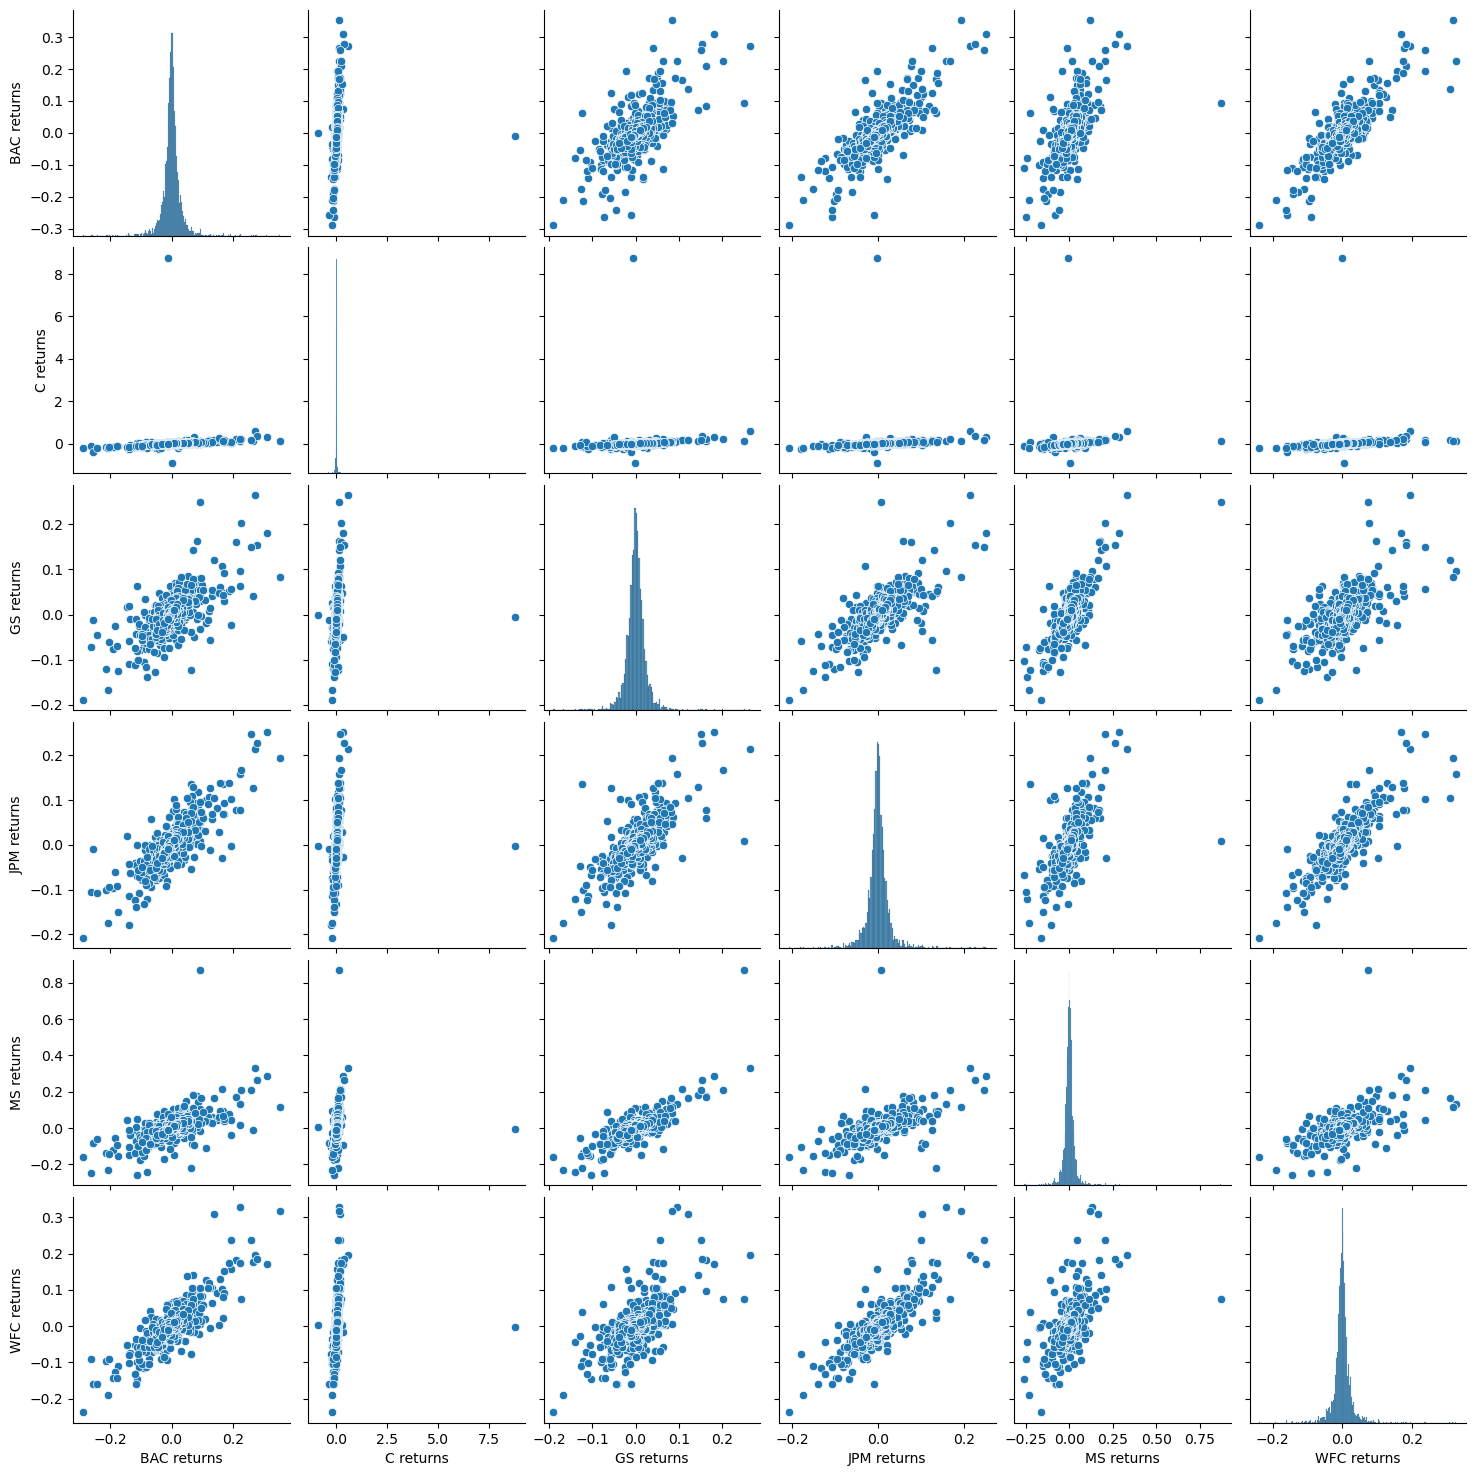

In [9]:
#returns[1:]
import seaborn as sns

# as first row is null , we need to skip this.
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. notice that 4 of the banks share the same day for the worst drop.**

In [10]:

#To return the index for the minimum value in each row
returns.idxmin()


BAC returns   2009-01-20
C returns     2011-05-06
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

In [11]:
# Best Single Day Gain
returns.idxmax()

BAC returns   2009-04-09
C returns     2011-05-09
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's & Morgan stanley's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

** Take a look at the standard deviation of the returns, So that we could classify some stocksas the riskiest over the entire time period**

In [12]:
returns.std() # Citigroup riskiest

BAC returns    0.036650
C returns      0.179969
GS returns     0.025346
JPM returns    0.027656
MS returns     0.037820
WFC returns    0.030233
dtype: float64

In [13]:
# classify as the riskiest for the year 2015?
returns['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or Bank of America.

BAC returns    0.016163
C returns      0.015289
GS returns     0.014046
JPM returns    0.014017
MS returns     0.016249
WFC returns    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\Rajat singh\anaconda3_2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



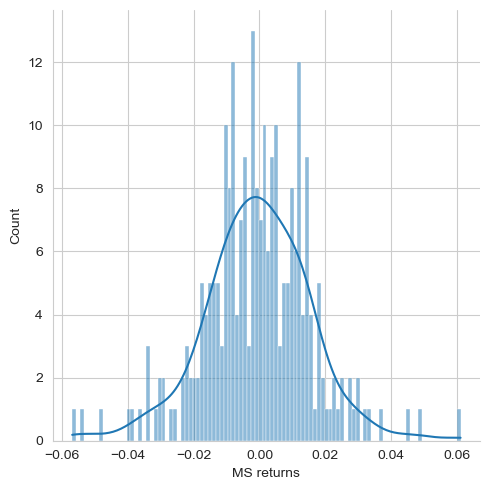

In [36]:
sns.displot(returns[(returns.index.year == 2015)]['MS returns'],kind='hist',kde=True,bins = 100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

C:\Users\Rajat singh\anaconda3_2\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


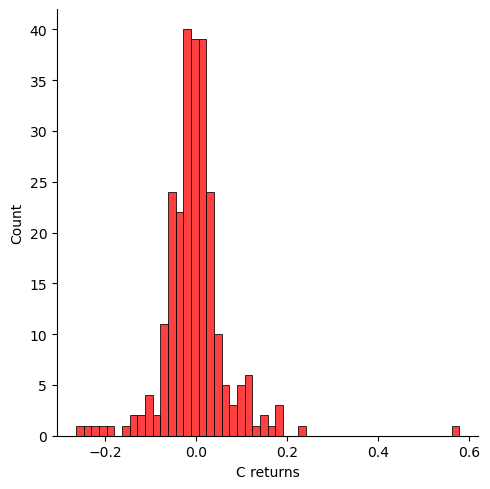

In [15]:
sns.displot(returns[returns.index.year==2008]['C returns'],color='red',bins=50)


A lot of this project will focus on visualizations. So we'll use different visualization libraries to try to create the plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import plotly
import cufflinks as cf
cf.go_offline()

** Creating a line plot showing Close price for each bank for the entire index of time. (we'll  use a for loop, or use [.xs]to get a cross section of the data.)**

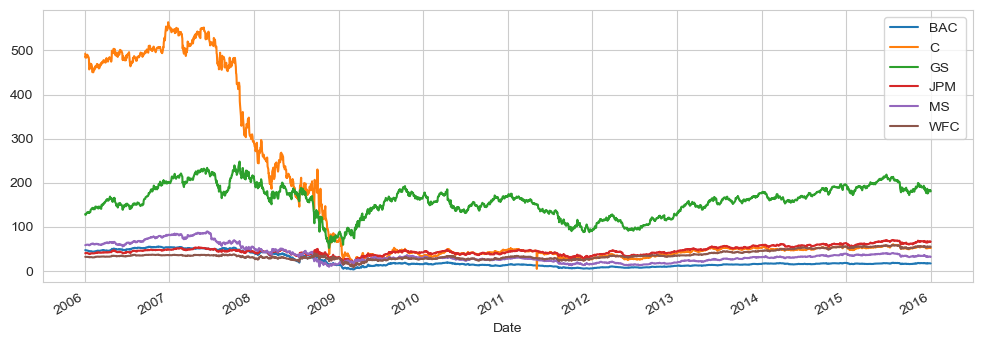

In [17]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

<Axes: xlabel='Date'>

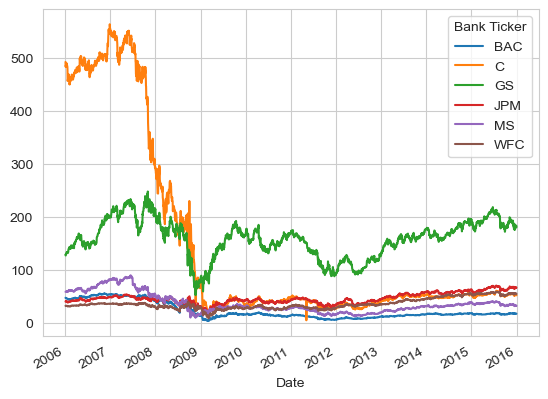

In [18]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [19]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

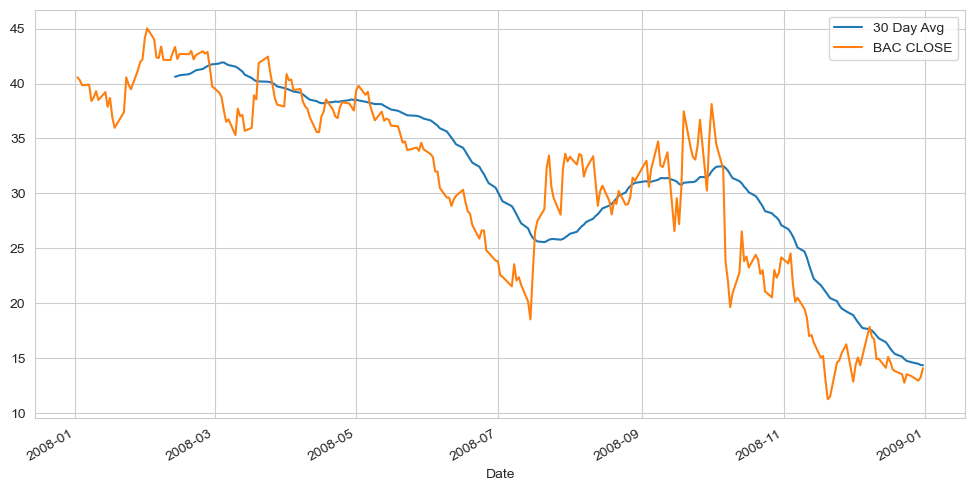

In [20]:

plt.figure(figsize=(12,6))
bank_stocks[bank_stocks.index.year==2008]["BAC"]['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
bank_stocks[bank_stocks.index.year==2008]["BAC"]['Close'].plot(label='BAC CLOSE')
plt.legend()

** Creating a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

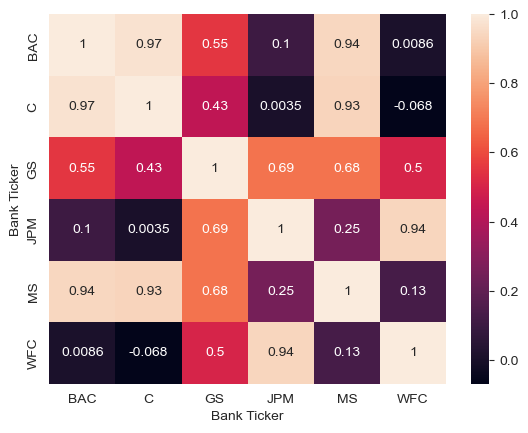

In [21]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

 seaborn's clustermap to cluster the correlations together:

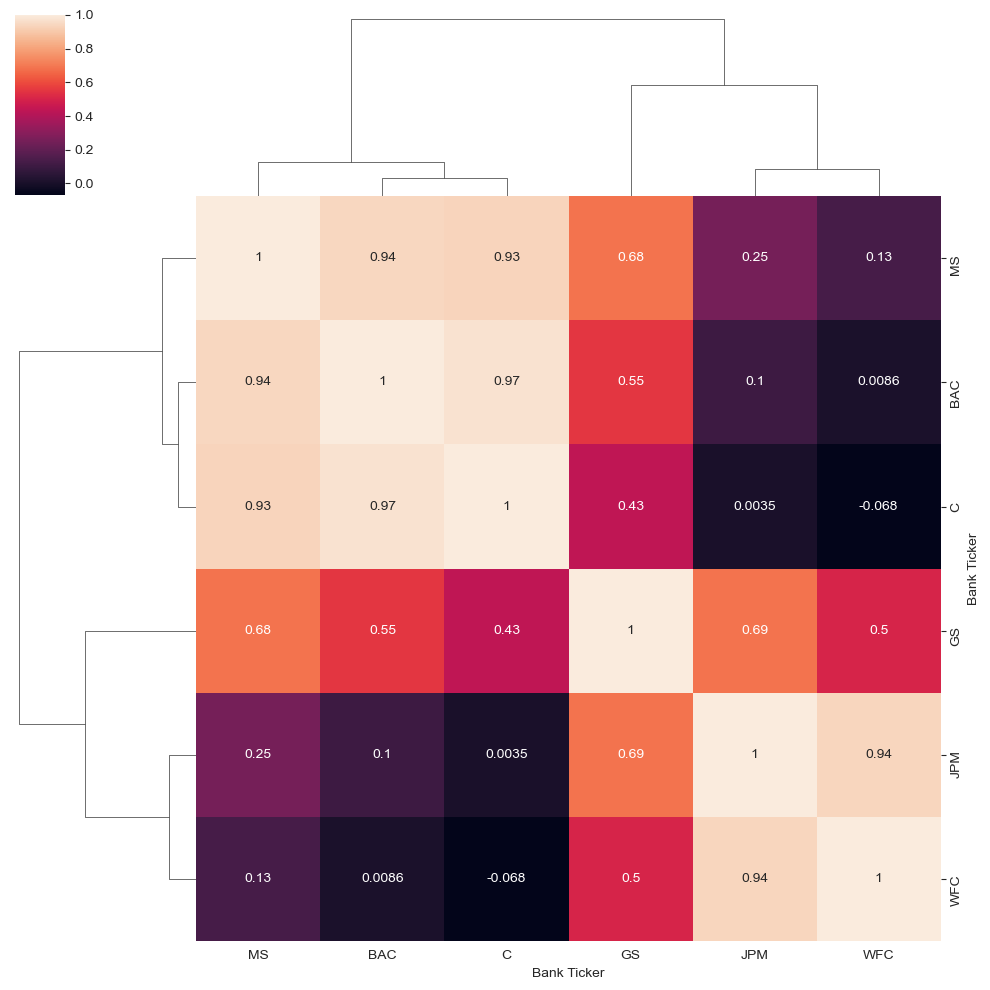

In [22]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [23]:
# similiar plot using plotly , which makes it interactive.
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')



In this part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [59]:
bank_stocks[((bank_stocks.index.year==2016) & (bank_stocks.index.month==1 ))|(bank_stocks.index.year==2015)].iplot()

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [60]:
bank_stocks[bank_stocks.index.year==2015]['MS']['Close'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [61]:
bank_stocks[bank_stocks.index.year==2015]['BAC']['Close'].ta_plot(study='boll')